<a href="https://colab.research.google.com/github/insafhamdi/Parkinson/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importation des bibliothèques nécessaires

In [20]:
!pip install skfeature-chappers


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modèles et métriques
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Normalisation
from sklearn.preprocessing import StandardScaler

# Feature selection
from skfeature.function.similarity_based import fisher_score


2. Chargement et exploration des données
python
Copier le code


In [22]:
# Charger les données
data = pd.read_csv("/content/pd_speech_features.csv", header=None)

# Aperçu des données
print(data.head())
print(data.describe())
print(data.info())

# Vérifier les valeurs manquantes
print(data.isnull().sum())


   0       1                  2        3        4          5    \
0  NaN     NaN  Baseline Features      NaN      NaN        NaN   
1   id  gender                PPE      DFA     RPDE  numPulses   
2    0       1            0.85247  0.71826  0.57227        240   
3    0       1            0.76686  0.69481  0.53966        234   
4    0       1            0.85083  0.67604  0.58982        232   

                6                 7                   8             9    ...  \
0               NaN               NaN                 NaN           NaN  ...   
1  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
2               239        0.00806353            8.68E-05       0.00218  ...   
3               233       0.008258256            7.31E-05       0.00195  ...   
4               231        0.00833959            6.04E-05       0.00176  ...   

                         745                        746  \
0                        NaN                        NaN   
1  t

#3. Analyse exploratoire des données


In [23]:
print(data.columns)


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       745, 746, 747, 748, 749, 750, 751, 752, 753, 754],
      dtype='int64', length=755)


In [24]:
print(data.head())


   0       1                  2        3        4          5    \
0  NaN     NaN  Baseline Features      NaN      NaN        NaN   
1   id  gender                PPE      DFA     RPDE  numPulses   
2    0       1            0.85247  0.71826  0.57227        240   
3    0       1            0.76686  0.69481  0.53966        234   
4    0       1            0.85083  0.67604  0.58982        232   

                6                 7                   8             9    ...  \
0               NaN               NaN                 NaN           NaN  ...   
1  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
2               239        0.00806353            8.68E-05       0.00218  ...   
3               233       0.008258256            7.31E-05       0.00195  ...   
4               231        0.00833959            6.04E-05       0.00176  ...   

                         745                        746  \
0                        NaN                        NaN   
1  t

In [25]:
data.columns = [f'feature_{i}' for i in range(data.shape[1])]
print(data.head())


  feature_0 feature_1          feature_2 feature_3 feature_4  feature_5  \
0       NaN       NaN  Baseline Features       NaN       NaN        NaN   
1        id    gender                PPE       DFA      RPDE  numPulses   
2         0         1            0.85247   0.71826   0.57227        240   
3         0         1            0.76686   0.69481   0.53966        234   
4         0         1            0.85083   0.67604   0.58982        232   

          feature_6         feature_7           feature_8     feature_9  ...  \
0               NaN               NaN                 NaN           NaN  ...   
1  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
2               239        0.00806353            8.68E-05       0.00218  ...   
3               233       0.008258256            7.31E-05       0.00195  ...   
4               231        0.00833959            6.04E-05       0.00176  ...   

                 feature_745                feature_746  \
0        

In [26]:
# Use the second row as the header
data.columns = data.iloc[1]
# Drop the first two rows as they are now redundant
data = data.iloc[2:]
# Reset the index
data.reset_index(drop=True, inplace=True)


In [27]:
data.rename(columns={'class': 'status'}, inplace=True)


<ipython-input-27-348a367be2e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'class': 'status'}, inplace=True)


In [28]:
print(data.head())
print(data.columns)


1 id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
0  0      1  0.85247  0.71826  0.57227       240              239   
1  0      1  0.76686  0.69481  0.53966       234              233   
2  0      1  0.85083  0.67604  0.58982       232              231   
3  1      0  0.41121  0.79672  0.59257       178              177   
4  1      0   0.3279  0.79782  0.53028       236              235   

1 meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
0       0.00806353           8.68E-05      0.00218  ...   
1      0.008258256           7.31E-05      0.00195  ...   
2       0.00833959           6.04E-05      0.00176  ...   
3      0.010857733        0.000182739      0.00419  ...   
4      0.008161574        0.002668863      0.00535  ...   

1 tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
0                     1.562                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3 

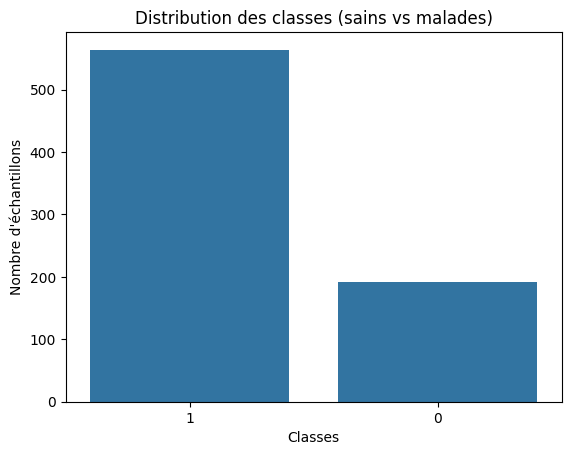

In [29]:
sns.countplot(x='status', data=data)
plt.title("Distribution des classes (sains vs malades)")
plt.xlabel("Classes")
plt.ylabel("Nombre d'échantillons")
plt.show()


#4. Prétraitement des données


In [30]:
# Suppression de colonnes non pertinentes
data = data.drop(columns=['id'])  # Add/remove columns as necessary

# Séparation des features et de la cible
X = data.drop(columns=['status'])
y = data['status']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#5. Sélection des features avec Fisher Score



In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ensure X_scaled is a numpy array (if it's still a pandas DataFrame)
X_scaled = np.array(X_scaled)

# Ensure y is a numpy array
y = np.array(y)

# Calcul des scores Fisher
scores = fisher_score.fisher_score(X_scaled, y)

# Sélection des 10 meilleures features
top_features_indices = np.argsort(scores)[-10:]

# Sélectionner les meilleures features de X_scaled
X_selected = X_scaled[:, top_features_indices]

# Accéder aux noms des colonnes correspondantes aux meilleures features (si vous avez toujours le DataFrame original)
top_feature_names = data.columns[top_features_indices]

print("Top 10 features sélectionnées:", top_feature_names)


Top 10 features sélectionnées: Index(['app_det_TKEO_mean_10_coef', 'app_det_TKEO_mean_7_coef',
       'tqwt_TKEO_mean_dec_7', 'app_entropy_log_8_coef',
       'mean_1st_delta_delta', 'mean_delta_delta_0th',
       'det_entropy_log_5_coef', 'VFER_SNR_TKEO', 'tqwt_TKEO_mean_dec_10',
       'det_LT_entropy_shannon_3_coef'],
      dtype='object', name=1)


#6. Entraînement des modèles


In [32]:
# Ensure that the target variable `y` is numeric (integer type)
y = y.astype(int)

# Now split the data and train the models again
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# XGBoost Model (Boosting)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Print evaluation metrics for XGBoost
print("Accuracy XGBoost:", accuracy_score(y_test, xgb_predictions))
print("F1-Score XGBoost:", f1_score(y_test, xgb_predictions))

# Random Forest Model (Bagging)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Print evaluation metrics for Random Forest
print("Accuracy Random Forest:", accuracy_score(y_test, rf_predictions))
print("F1-Score Random Forest:", f1_score(y_test, rf_predictions))


Accuracy XGBoost: 0.7960526315789473
F1-Score XGBoost: 0.869198312236287
Accuracy Random Forest: 0.7697368421052632
F1-Score Random Forest: 0.8484848484848484


Hyperparameter Tuning

In [33]:
pip install --upgrade xgboost


  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [34]:
pip install scikit-learn==1.0.2


In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0]
}

# Instantiate the model
xgb_model = xgb.XGBClassifier()

# Use RandomizedSearchCV instead of GridSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters found: ", xgb_random_search.best_params_)
print("Best score: ", xgb_random_search.best_score_)


Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1}
Best score:  0.8013911845730026


In [36]:
# Evaluate the model on the test set
best_xgb_model = xgb_random_search.best_estimator_
test_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Make predictions and evaluate other metrics like F1-Score, Precision, Recall, ROC-AUC
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

y_pred = best_xgb_model.predict(X_test)

print("F1-Score: ", f1_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, y_pred))


Test accuracy: 0.7763157894736842
F1-Score:  0.8547008547008548
Precision:  0.8333333333333334
Recall:  0.8771929824561403
ROC-AUC:  0.6754385964912281


#7. Validation croisée



In [37]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the best XGBoost model
cv_scores = cross_val_score(best_xgb_model, X_scaled, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.82236842 0.86754967 0.8410596  0.8410596  0.78145695]
Mean cross-validation score:  0.8306988497734402


Compare with random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the model
rf_model = RandomForestClassifier()

# Use RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters for Random Forest found: ", rf_random_search.best_params_)
print("Best score for Random Forest: ", rf_random_search.best_score_)

# Assuming you've already tuned the Random Forest model and stored it in rf_random_search
best_rf_model = rf_random_search.best_estimator_

# Evaluate Random Forest on the test set
rf_test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

# Compare other metrics
rf_y_pred = best_rf_model.predict(X_test)

print("Random Forest F1-Score: ", f1_score(y_test, rf_y_pred))
print("Random Forest Precision: ", precision_score(y_test, rf_y_pred))
print("Random Forest Recall: ", recall_score(y_test, rf_y_pred))
print("Random Forest ROC-AUC: ", roc_auc_score(y_test, rf_y_pred))


Best parameters for Random Forest found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
Best score for Random Forest:  0.7963636363636363
Random Forest Test Accuracy: 0.7631578947368421
Random Forest F1-Score:  0.8461538461538461
Random Forest Precision:  0.825
Random Forest Recall:  0.868421052631579
Random Forest ROC-AUC:  0.6578947368421053


#Visualizations

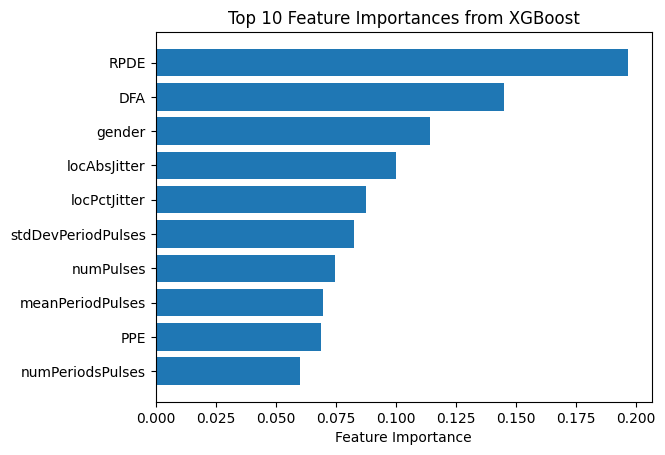

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Get the importance of features from the best XGBoost model
xgb_importance = best_xgb_model.feature_importances_

# Get the indices of the top 10 features
top_10_indices = np.argsort(xgb_importance)[-10:]

# Get the top 10 feature names
top_10_features = X.columns[top_10_indices]

# Plot the feature importances
plt.barh(range(10), xgb_importance[top_10_indices])
plt.yticks(range(10), top_10_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from XGBoost')
plt.show()
